## TrpR_IAA

Exemplary design of the trpytophane repressor (PDB: 1ZT9) with the ligand indole-3-acetic acid (IAA).

In [1]:
# This is a comment. It's marked by a leading "#" symbol

# Import OS and system libraries
import sys
import os
import logging

# Append the pocketoptimizer code to your $PYTHONPATH
cwd = os.getcwd()
po_dir = os.path.abspath(os.path.join(cwd, '..'))
project_dir = os.path.join(cwd, 'TrpR_IAA')
if not po_dir in sys.path:
    sys.path.insert(0, po_dir)

# Import Pocketoptimizer
import pocketoptimizer as po

# Remove most warnings, only show Errors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
# Initialize a new design pipeline
design = po.DesignPipeline(work_dir=project_dir,         # Path to working directory containing scaffold and ligand subdirectory
                           ph=7,                         # pH used for protein and ligand protonation
                           forcefield='amber_ff14SB',    # forcefield used for all energy computations
                           intra=False,                  # Whether to score intramolecular energies or not
                           elec=0.01,                    # Scaling factor for electrostatic energies
                           ncpus=8)                      # Number of CPUs for multiprocessing

2022-09-18 14:24:22,912 - pocketoptimizer.ui - INFO - Logging to: /agh/projects/jakob/PycharmProjects/PocketOptimizer2/docs/tutorials/TrpR_IAA/pocketoptimizer.log


### From now on you are inside the directory of your design!

In [3]:
# Prepare ligand
design.parameterize_ligand(input_ligand='ligand/IAA.sdf',  # Input ligand structure file could be .mol2/.sdf
                           addHs=True                      # Whether to add hydrogen atoms to the input structure
                           )

2022-09-18 14:24:24,655 - numexpr.utils - INFO - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-09-18 14:24:24,655 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
beignet-opencl-icd: no supported GPU found, this is probably the wrong opencl-icd package for this hardware
(If you have multiple ICDs installed and OpenCL works, you can ignore this message)
2022-09-18 14:24:25,361 - root - WARNING - Warning: importing 'simtk.openmm' is deprecated.  Import 'openmm' instead.
2022-09-18 14:24:25,864 - pocketoptimizer.preparation.structure_building - INFO - Adding hydrogen atoms to the ligand according to pH: 7.
2022-09-18 14:24:26,293 - pocketoptimizer.preparation.structure_building - INFO - Parameterize ligand for GAFF2.
2022-09-18 14:24:26

In [4]:
design.prepare_protein(
    protein_structure='scaffold/1ZT9.pdb',  # Input PDB
    keep_chains=['A', 'B'],  # Specific protein chains to keep
    minimize=True,           # Whether to minimize the input protein structure
    backbone_restraint=True, # Restrains the backbone during the minimization
    cuda=False,               # Performs minimization on CPU instead of GPU
    discard_mols=[{'chain': 'A', 'resid': '1001'}]     # Special molecules to exclude. Per default everything, but peptides have to be defined manually
    )

2022-09-18 14:24:26,776 - pocketoptimizer.ui - INFO - Start Protein Preparation.
2022-09-18 14:24:26,780 - pocketoptimizer.preparation.structure_building - INFO - Starting protein preparation.
2022-09-18 14:24:27,014 - pocketoptimizer.preparation.structure_building - INFO - Protonate protein according to pH: 7.
2022-09-18 14:24:27,248 - moleculekit.tools.preparation - WARNING - Both chains and segments are defined in Molecule.chain / Molecule.segid, however they are inconsistent. Protein preparation will use the chain information.



---- Molecule chain report ----
Chain A:
    First residue: SER     5  
    Final residue: LEU   105  
Chain B:
    First residue: SER     5  
    Final residue: TRP   901  
---- End of chain report ----



2022-09-18 14:24:29,345 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 A to HID
2022-09-18 14:24:29,346 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 A to HID
2022-09-18 14:24:29,347 - moleculekit.tools.preparation - INFO - Modified residue HIS    16 B to HID
2022-09-18 14:24:29,347 - moleculekit.tools.preparation - INFO - Modified residue HIS    35 B to HID
2022-09-18 14:24:29,349 - moleculekit.tools.preparation - WARNING - Dubious protonation state: the pKa of 2 residues is within 1.0 units of pH 7.0.
2022-09-18 14:24:29,349 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 A (pKa= 6.16)
2022-09-18 14:24:29,350 - moleculekit.tools.preparation - WARNING - Dubious protonation state:    HIS    16 B (pKa= 6.24)
2022-09-18 14:24:29,986 - pocketoptimizer.preparation.structure_building - INFO - Successfully prepared protein structure.
2022-09-18 14:24:29,987 - pocketoptimizer.ui - INFO - Building complex.
2022-09-1

In [5]:
design.prepare_lig_conformers(
    nconfs=50,         # Maximum number of conformers to produce'
    method='genetic',  # Genetic method in OpenBabel, other option is confab
    score='rmsd',      # Filters conformers based on RMSD
    )

2022-09-18 14:24:59,727 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Starting ligand conformer generation using obabel.
2022-09-18 14:24:59,728 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Selected Method: genetic.
2022-09-18 14:25:00,307 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Generated 50 conformers.
2022-09-18 14:25:00,309 - pocketoptimizer.sampling.conformer_generator_obabel - INFO - Conformer sampling was successful.


In [6]:
# Your mutations
design.set_mutations([{'mutations': ['LEU', 'THR'], 'resid': '88', 'chain': 'B'}, 
                      {'mutations': ['ARG'], 'resid': '84', 'chain': 'B'}, 
                      {'mutations': ['LEU','THR'], 'resid': '44', 'chain': 'A'}]
)

2022-09-18 14:25:00,326 - pocketoptimizer.ui - INFO - If design positions are removed or added a new design run should be started.


In [7]:
# Prepares all defined mutants and glycine scaffolds for side chain rotamer and ligand pose sampling
design.prepare_mutants(sampling_pocket='GLY')

2022-09-18 14:25:00,935 - pocketoptimizer.ui - INFO - Start building mutated protein scaffold variants.
2022-09-18 14:25:00,936 - pocketoptimizer.ui - INFO - Build GLY sampling pockets.
2022-09-18 14:25:01,511 - pocketoptimizer.preparation.structure_building - INFO - Build ligand sampling pocket.
2022-09-18 14:25:02,097 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-09-18 14:25:02,287 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-09-18 14:25:02,642 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-09-18 14:25:04,213 - pocketoptimizer.preparation.structure_building - INFO - Build mutation: A_44_LEU.
2022-09-18 14:25:04,727 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2022-09-18 14:25:04,891 - pocketoptimizer.preparation.structure_building - INFO - Starting the build.
2022-09-18 14:25:05,213 - pocketoptimizer.preparation.structure_building - INFO - Finished building.
2022-09-18 14:25:06,834 - 

In [8]:
# Sampling of side chain rotamers
design.sample_sidechain_rotamers(
    vdw_filter_thresh=100,         # Energy threshold of 100 kcal/mol for filtering rotamers
    library='dunbrack',            # Use dunbrack rotamer library
    dunbrack_filter_thresh=0.001,  # Probability threshold for filtering rotamers (0.1%)
    accurate=False                 # Increases the number of rotamers sampled when using dunbrack
    )

2022-09-18 14:25:40,253 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Start rotamer sampling procedure using FFEvaluate.
2022-09-18 14:25:40,254 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Using 8 CPU's for multiprocessing.
2022-09-18 14:25:40,986 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_LEU not sampled yet.


A_44_LEU:   0%|          | 0/64 [00:00<?, ?it/s]

2022-09-18 14:25:58,564 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 25/64 rotamers within energy threshold of 100 kcal/mol for LEU at position: A_44.
2022-09-18 14:25:58,578 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: A_44_THR not sampled yet.


A_44_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-18 14:26:08,435 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: A_44.
2022-09-18 14:26:08,445 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_84_ARG not sampled yet.


B_84_ARG:   0%|          | 0/415 [00:00<?, ?it/s]

2022-09-18 14:27:24,397 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 350/415 rotamers within energy threshold of 100 kcal/mol for ARG at position: B_84.
2022-09-18 14:27:24,442 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_LEU not sampled yet.


B_88_LEU:   0%|          | 0/55 [00:00<?, ?it/s]

2022-09-18 14:27:41,449 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 21/55 rotamers within energy threshold of 100 kcal/mol for LEU at position: B_88.
2022-09-18 14:27:41,461 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamers for residue: B_88_THR not sampled yet.


B_88_THR:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-18 14:27:51,135 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Writing 6/10 rotamers within energy threshold of 100 kcal/mol for THR at position: B_88.
2022-09-18 14:27:51,159 - pocketoptimizer.sampling.sidechain_rotamers_ffev - INFO - Rotamer sampling procedure is finished.


In [9]:
# Sampling of ligand poses
# Defines a grid in which the ligand is translated and rotated along.
#                       Range, Steps
sample_grid = {'trans': [1, 0.5],  # Angstrom
               'rot': [20, 20]}    # Degree
design.sample_lig_poses(
    method='grid',         #  Uses the grid method. Other option is random
    grid=sample_grid,      #  Defined grid for sampling    
    vdw_filter_thresh=100, #  Energy threshold of 100 kcal/mol for filtering ligand poses
    max_poses=10000        #  Maximum number of poses
)

2022-09-18 14:27:51,180 - pocketoptimizer.ui - INFO - Sample ligand poses.
2022-09-18 14:27:51,182 - pocketoptimizer.sampling.ligand_poses - INFO - Start ligand pose sampling procedure.
2022-09-18 14:27:52,597 - pocketoptimizer.sampling.ligand_poses - INFO - Generate possible poses within the defined grid.


Ligand Conformers:   0%|          | 0/51 [00:00<?, ?it/s]

2022-09-18 14:27:52,677 - pocketoptimizer.sampling.ligand_poses - INFO - Created possible 4641 poses.
2022-09-18 14:27:52,678 - pocketoptimizer.sampling.ligand_poses - INFO - Start filtering poses.
2022-09-18 14:27:52,679 - pocketoptimizer.sampling.ligand_poses - INFO - Using 8 CPUs for multiprocessing.


Filter Poses:   0%|          | 0/4641 [00:00<?, ?it/s]

2022-09-18 14:38:26,266 - pocketoptimizer.sampling.ligand_poses - INFO - Calculated 1029 poses within energy threshold of 100 kcal/mol.
2022-09-18 14:38:26,304 - pocketoptimizer.sampling.ligand_poses - INFO - Pose sampling procedure was successful.


In [10]:
design.calculate_energies(
    scoring='vina',           #  Method to score protein-ligand interaction
)

2022-09-18 14:38:26,337 - pocketoptimizer.ui - INFO - Start energy calculations.
2022-09-18 14:38:26,338 - pocketoptimizer.ui - INFO - Using 8 CPUs for multiprocessing.
2022-09-18 14:38:26,339 - pocketoptimizer.ui - INFO - Calculate Sidechain-Scaffold Energies.
2022-09-18 14:38:26,339 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-09-18 14:38:26,487 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_LEU not computed yet.


  0%|          | 0/25 [00:00<?, ?it/s]

2022-09-18 14:38:34,384 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: A_44_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-09-18 14:38:41,955 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_84_ARG not computed yet.


  0%|          | 0/350 [00:00<?, ?it/s]

2022-09-18 14:38:58,923 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_LEU not computed yet.


  0%|          | 0/21 [00:00<?, ?it/s]

2022-09-18 14:39:06,555 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self interaction energy for residue: B_88_THR not computed yet.


  0%|          | 0/6 [00:00<?, ?it/s]

2022-09-18 14:39:13,493 - pocketoptimizer.scoring.sidechain_scaffold_energies - INFO - Sidechain-Scaffold/Self calculation was successful.
2022-09-18 14:39:13,495 - pocketoptimizer.ui - INFO - Calculate Sidechain-Pair Energies.
2022-09-18 14:39:13,496 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Compute energies using forcefield: amber_ff14SB.
2022-09-18 14:39:14,162 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_84_ARG not computed yet.


  0%|          | 0/8750 [00:00<?, ?it/s]

2022-09-18 14:39:25,567 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_84_ARG not computed yet.


  0%|          | 0/2100 [00:00<?, ?it/s]

2022-09-18 14:39:33,458 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_LEU not computed yet.


  0%|          | 0/525 [00:00<?, ?it/s]

2022-09-18 14:39:40,603 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_LEU/B_88_THR not computed yet.


  0%|          | 0/150 [00:00<?, ?it/s]

2022-09-18 14:39:47,766 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_LEU not computed yet.


  0%|          | 0/126 [00:00<?, ?it/s]

2022-09-18 14:39:54,819 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: A_44_THR/B_88_THR not computed yet.


  0%|          | 0/36 [00:00<?, ?it/s]

2022-09-18 14:40:02,619 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_LEU not computed yet.


  0%|          | 0/7350 [00:00<?, ?it/s]

2022-09-18 14:40:12,903 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Sidechain interaction energy for residue pair: B_84_ARG/B_88_THR not computed yet.


  0%|          | 0/2100 [00:00<?, ?it/s]

2022-09-18 14:40:20,842 - pocketoptimizer.scoring.sidechain_pair_energies - INFO - Sidechain-Pair calculation was successful.
2022-09-18 14:40:20,845 - pocketoptimizer.ui - INFO - Calculate Ligand-Scaffold/Sidechain-Interaction-Energies.
2022-09-18 14:40:20,849 - pocketoptimizer.scoring.smina_scorer - INFO - Score ligand interactions using vina.
2022-09-18 14:40:22,199 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Scaffold/Self interaction energy not computed yet.
2022-09-18 14:40:22,200 - pocketoptimizer.scoring.smina_scorer - INFO - Prepare fixed scaffold.


Ligand/Scaffold:   0%|          | 0/1 [00:00<?, ?it/s]

2022-09-18 14:40:24,432 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_LEU not computed yet.
2022-09-18 14:40:24,520 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_LEU.


Ligand/A_44_LEU:   0%|          | 0/25 [00:00<?, ?it/s]

2022-09-18 14:40:45,572 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: A_44_THR not computed yet.
2022-09-18 14:40:45,612 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: A_44_THR.


Ligand/A_44_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-09-18 14:40:50,728 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_84_ARG not computed yet.
2022-09-18 14:40:51,601 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_84_ARG.


Ligand/B_84_ARG:   0%|          | 0/350 [00:00<?, ?it/s]

2022-09-18 14:45:48,098 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_LEU not computed yet.
2022-09-18 14:45:48,229 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_LEU.


Ligand/B_88_LEU:   0%|          | 0/21 [00:00<?, ?it/s]

2022-09-18 14:46:06,793 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand-Sidechain interaction energy for residue: B_88_THR not computed yet.
2022-09-18 14:46:06,833 - pocketoptimizer.scoring.smina_scorer - INFO - Loop over rotamers of residue: B_88_THR.


Ligand/B_88_THR:   0%|          | 0/6 [00:00<?, ?it/s]

2022-09-18 14:46:12,288 - pocketoptimizer.scoring.smina_scorer - INFO - Ligand scoring was successful.
2022-09-18 14:46:12,289 - pocketoptimizer.ui - INFO - Energy calculation was successful.


2022-09-18 14:49:12,619 - pocketoptimizer.solving.sontag_solver - INFO - Calculating Solutions.


Solutions:   0%|          | 0/10 [00:00<?, ?it/s]

2022-09-18 14:50:05,125 - pocketoptimizer.ui - INFO - Parse calculated solutions.
2022-09-18 14:50:05,558 - pocketoptimizer.ui - INFO - Read 10 solution(s) from solver output.
2022-09-18 14:50:09,624 - pocketoptimizer.ui - INFO - Write text report.
2022-09-18 14:50:09,664 - pocketoptimizer.ui - INFO - Wrote solution report text file(s).
2022-09-18 14:50:09,667 - pocketoptimizer.ui - INFO - Wrote summary text file.
2022-09-18 14:50:09,667 - pocketoptimizer.ui - INFO - Write html report.
2022-09-18 14:50:09,757 - pocketoptimizer.ui - INFO - Wrote solution report html file(s).
2022-09-18 14:50:09,758 - pocketoptimizer.design.html_reporter - INFO - Create energy plot.
2022-09-18 14:50:10,148 - pocketoptimizer.design.html_reporter - INFO - Create sequence logo for mutable positions.


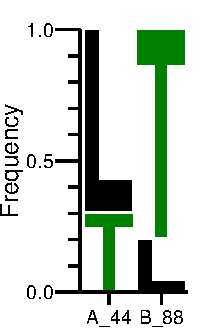

2022-09-18 14:50:10,583 - pocketoptimizer.ui - INFO - Wrote summary html file.
2022-09-18 14:50:10,584 - pocketoptimizer.ui - INFO - Creating design structure files.
2022-09-18 14:50:10,584 - pocketoptimizer.ui - INFO - Create Structures.
2022-09-18 14:50:20,171 - pocketoptimizer.ui - INFO - Creating PyMol scripts.
2022-09-18 14:50:20,197 - pocketoptimizer.ui - INFO - 10 best design solution(s) for design with forcefield: amber_ff14SB, scoring method: vina and ligand scaling: 5 identified.


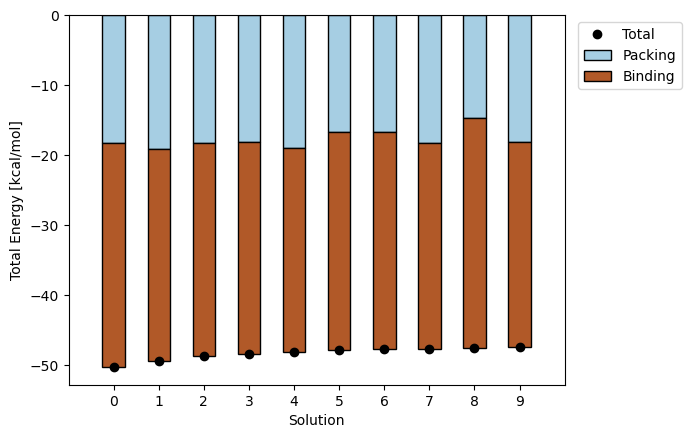

In [13]:
# Compute the lowest energy structures using linear programming
design.design(
    num_solutions=10,           #  Number of solutions to compute
    ligand_scaling=5,          #  Scaling factor for binding-related energies
)

In [8]:
# Do not run this unless you wanna fully clean your working directory from all created files and folders
design.clean(scaffold=True, ligand=True)

2022-09-18 14:24:07,534 - pocketoptimizer.ui - INFO - All scaffold files are deleted.
2022-09-18 14:24:07,768 - pocketoptimizer.ui - INFO - All ligand files are deleted.
2022-09-18 14:24:07,804 - pocketoptimizer.ui - INFO - Deleted settings file.
2022-09-18 14:24:07,808 - pocketoptimizer.ui - INFO - Deleted log file.
2022-09-18 14:24:07,810 - pocketoptimizer.ui - INFO - All files were deleted.
2022-09-18 14:24:07,812 - pocketoptimizer.ui - INFO - Initialize a new DesignPipeline.
